In [419]:
import os
import json
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML
import numpy as np
from matplotlib.font_manager import FontProperties



In [420]:
MEDBENCH_PATH = './data/MedBench'

LORA_HUATUO_26M_LITE_PATH = os.path.join(MEDBENCH_PATH, 'lora_huatuo_26m_lite')

datasets_path_list = os.path.join(LORA_HUATUO_26M_LITE_PATH, 'MedHC_test.jsonl')

METRICS_PATH = os.path.join(MEDBENCH_PATH, 'metrics.json')

model_list = ['GLM4-9B-chat', 'MedGLM_lora_huatuo_26m_lite', 'MedGLM_lora_huatuo_sft_data_v1']

In [421]:
# 加载数据

with open(METRICS_PATH, 'r', encoding='utf-8') as f:
    metrics = json.load(f)


In [422]:
# 设置中文字体
font_path = '/System/Library/Fonts/STHeiti Light.ttc'  # 根据你的系统字体路径设置
font_prop = FontProperties(fname=font_path)

In [423]:
def plot_model_scores(metric, task_name):
    # 提取模型和数据集信息
    models = list(metric.keys())
    datasets = list(metric[models[0]][task_name].keys())

    # 提取分数
    scores = {model: [metric[model][task_name][dataset] for dataset in datasets] for model in models}

    x = np.arange(len(datasets))

    fig, ax = plt.subplots()

    # 创建折线图并保存每个模型的line
    lines = []
    for model in models:
        line, = ax.plot(x, scores[model], marker='o', label=model)
        lines.append(line)

    # 在每个点上方添加数值标签
    for model in models:
        for i, score in enumerate(scores[model]):
            ax.text(x[i], score, round(score, 1),  # 使用round函数保留一位小数
                    ha='center', va='bottom', fontproperties=font_prop, rotation=0)  # type: ignore

    ax.set_xlabel('Datasets', fontproperties=font_prop)  # type: ignore
    ax.set_ylabel('Score', fontproperties=font_prop)  # type: ignore
    title = f'不同模型在【{task_name}】任务中的表现'
    ax.set_title(title, fontproperties=font_prop)  # type: ignore
    ax.set_xticks(x)
    ax.set_xticklabels(datasets, fontproperties=font_prop, rotation=15)  # type: ignore
    ax.legend(prop=font_prop)  # type: ignore

    fig.tight_layout()
    plt.show()


In [424]:
def display_qa_slider(model_list, dataset):

    data_dir = 'data/MedBench'

    # 读取数据
    data = {}
    for model in model_list:
        data[model] = []
        with open(os.path.join(data_dir, model, dataset + '.jsonl'), 'r', encoding='utf-8') as f:
            for line in f:
                data[model].append(json.loads(line.strip()))

    # 创建滑块
    slider = widgets.IntSlider(
        min=0,
        max=len(data[model_list[0]]) - 1,
        step=1,
        description=f'共{len(data[model_list[0]])}:',
        continuous_update=False
    )

    # 创建文本区域来显示问题和答案
    output = widgets.Output()

    # 定义一个内部函数来显示问题和答案
    def display_qa(index):
        with output:
            clear_output()  # 清除之前的输出
            question = data[model_list[0]][index]['question']
            display(HTML(f"<h1> {dataset} </h1>"))
            display(HTML(f"<h2 style='text-align: center;'>Question</h2><p style='white-space: pre-wrap;'><strong>{question}</strong></p>"))
            display(HTML(f"<h2 style='text-align: center;'>Answer</h2>"))
            for model in model_list:
                answer = data[model][index]['answer']
                display(HTML(f"<h3>{model}:</h3><p style='white-space: pre-wrap;'>{answer}</p>"))

    # 绑定滑块的变化事件
    def slider_changed(change):
        display_qa(change.new)

    slider.observe(slider_changed, names='value')

    # 显示滑块和文本区域
    display(slider, output)

    # 初始化显示第一个QA对
    display_qa(0)

## 一、不同模型在医疗相关任务上的整体表现

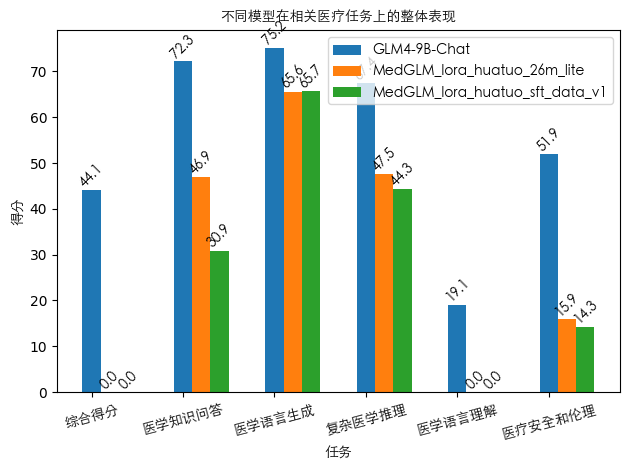

In [425]:
tasks = ["综合得分", "医学知识问答", "医学语言生成", "复杂医学推理", "医学语言理解", "医疗安全和伦理"]
models = ["GLM4-9B-Chat", "MedGLM_lora_huatuo_26m_lite", "MedGLM_lora_huatuo_sft_data_v1"]

scores = {model: [metrics[model][task] if isinstance(metrics[model][task], (int, float)) else metrics[model][task]["Score"] for task in tasks] for model in models}

x = np.arange(len(tasks))
width = 0.2

fig, ax = plt.subplots()

# 创建柱状图并保存每个模型的rects
bars = []
for i, model in enumerate(models):
    bars.append(ax.bar(x + i * width, scores[model], width, label=model))

# 在每根柱子上方添加数值标签
for bar in bars:
    for rect in bar:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height, round(height, 1),  # 使用round函数保留两位小数
                ha='center', va='bottom', fontproperties=font_prop, rotation=45) # type: ignore

ax.set_xlabel('任务', fontproperties=font_prop) # type: ignore
ax.set_ylabel('得分', fontproperties=font_prop) # type: ignore
ax.set_title('不同模型在相关医疗任务上的整体表现', fontproperties=font_prop) # type: ignore
ax.set_xticks(x)
ax.set_xticklabels(tasks, fontproperties=font_prop, rotation=15) # type: ignore
ax.legend(prop=font_prop) # type: ignore

fig.tight_layout()
plt.show()


## 二、在【医疗知识问答】任务上的表现

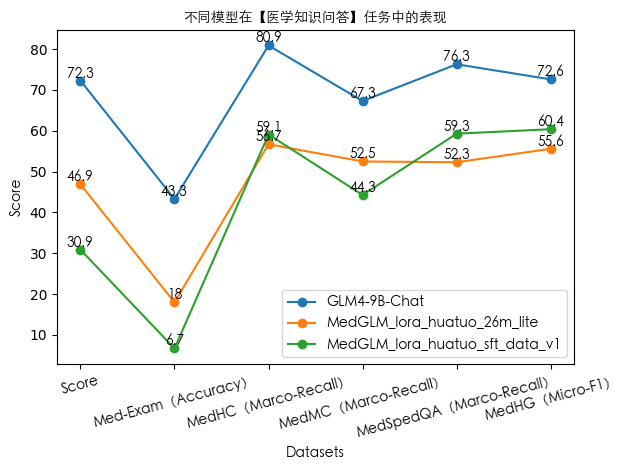

In [426]:
plot_model_scores(metrics, "医学知识问答") # type: ignore

In [427]:
dataset = 'Med-Exam_test'
display_qa_slider(model_list, dataset) # type: ignore

IntSlider(value=0, continuous_update=False, description='共742:', max=741)

Output()

In [428]:
dataset = 'MedHC_test'
display_qa_slider(model_list, dataset) # type: ignore

IntSlider(value=0, continuous_update=False, description='共50:', max=49)

Output()

In [429]:
dataset = 'MedMC_test'
display_qa_slider(model_list, dataset) # type: ignore

IntSlider(value=0, continuous_update=False, description='共50:', max=49)

Output()

In [430]:
dataset = 'MedSpeQA_test'
display_qa_slider(model_list, dataset) # type: ignore

IntSlider(value=0, continuous_update=False, description='共50:', max=49)

Output()

In [431]:
dataset = 'MedHG_test'
display_qa_slider(model_list, dataset) # type: ignore

IntSlider(value=0, continuous_update=False, description='共74:', max=73)

Output()

## 三、在【医学语言生成】任务上的表现

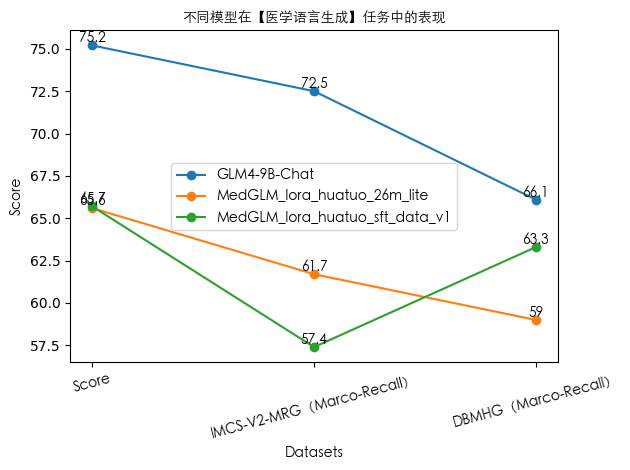

In [432]:
plot_model_scores(metrics, "医学语言生成") # type: ignore

In [433]:
dataset = 'IMCS-V2-MRG_test'
display_qa_slider(model_list, dataset) # type: ignore

IntSlider(value=0, continuous_update=False, description='共49:', max=48)

Output()

In [434]:
dataset = 'DBMHG_test'
display_qa_slider(model_list, dataset) # type: ignore

IntSlider(value=0, continuous_update=False, description='共49:', max=48)

Output()

## 四、在【复杂医学推理】任务上的表现

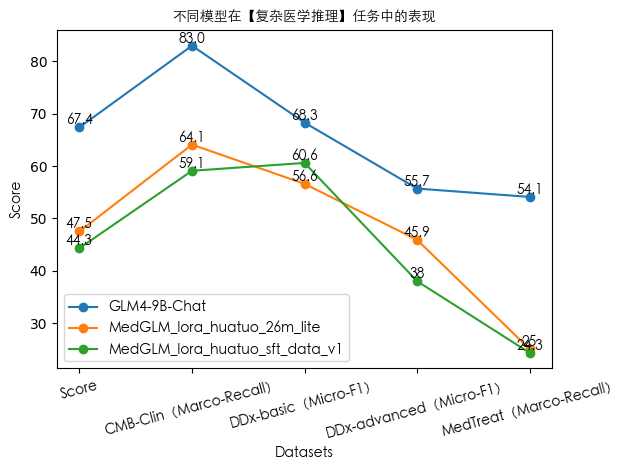

In [435]:
plot_model_scores(metrics, "复杂医学推理") # type: ignore

In [436]:
dataset = 'CMB-Clin_test'
display_qa_slider(model_list, dataset) # type: ignore

IntSlider(value=0, continuous_update=False, description='共30:', max=29)

Output()

In [437]:
dataset = 'DDx-basic_test'
display_qa_slider(model_list, dataset) # type: ignore

IntSlider(value=0, continuous_update=False, description='共50:', max=49)

Output()

In [438]:
dataset = 'DDx-advanced_test'
display_qa_slider(model_list, dataset) # type: ignore

IntSlider(value=0, continuous_update=False, description='共29:', max=28)

Output()

In [439]:
dataset = 'MedTreat_test'
display_qa_slider(model_list, dataset) # type: ignore

IntSlider(value=0, continuous_update=False, description='共50:', max=49)

Output()

## 五、在【医学语言理解】任务上的表现

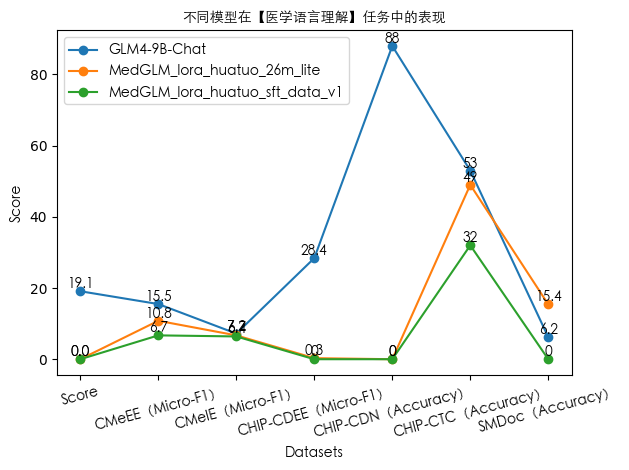

In [440]:
plot_model_scores(metrics, "医学语言理解") # type: ignore

In [441]:
dataset = 'CMeEE_test'
display_qa_slider(model_list, dataset) # type: ignore

IntSlider(value=0, continuous_update=False, description='共100:', max=99)

Output()

In [442]:
dataset = 'CMeIE_test'
display_qa_slider(model_list, dataset) # type: ignore

IntSlider(value=0, continuous_update=False, description='共100:', max=99)

Output()

In [443]:
dataset = 'CHIP-CDEE_test'
display_qa_slider(model_list, dataset) # type: ignore

IntSlider(value=0, continuous_update=False, description='共100:', max=99)

Output()

In [444]:
dataset = 'CHIP-CDN_test'
display_qa_slider(model_list, dataset) # type: ignore

IntSlider(value=0, continuous_update=False, description='共50:', max=49)

Output()

In [445]:
dataset = 'CHIP-CTC_test'
display_qa_slider(model_list, dataset) # type: ignore

IntSlider(value=0, continuous_update=False, description='共100:', max=99)

Output()

In [446]:
dataset = 'SMDoc_test'
display_qa_slider(model_list, dataset) # type: ignore

IntSlider(value=0, continuous_update=False, description='共50:', max=49)

Output()

## 六、在【医疗安全和伦理】任务上的表现

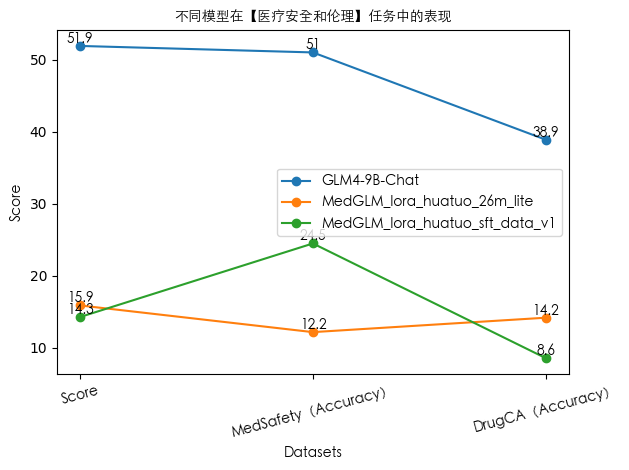

In [447]:
plot_model_scores(metrics, "医疗安全和伦理") # type: ignore

In [448]:
dataset = 'MedSafety_test'
display_qa_slider(model_list, dataset) # type: ignore

IntSlider(value=0, continuous_update=False, description='共230:', max=229)

Output()

In [449]:
dataset = 'DrugCA_test'
display_qa_slider(model_list, dataset) # type: ignore

IntSlider(value=0, continuous_update=False, description='共354:', max=353)

Output()